In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import pandas as pd
import tensorflow as tf
from keras.layers.core import Flatten

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path) #Read dataset from file csv
    data = data.values #Load values
    np.random.shuffle(data) #Shuffle dataset
    x = data[:, 1:].reshape(-1, 28, 28, 1)
    y = data[:, 0].astype(np.int32)
    y = tf.keras.utils.to_categorical(y, 10)
    return x, y
X_train, y_train = load_data("../input/mnist-in-csv/mnist_train.csv")
X_test, y_test = load_data("../input/mnist-in-csv/mnist_test.csv")
X = X_test

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [5]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
#Add Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'softmax'))

2022-05-16 03:18:55.545483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:18:55.651300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:18:55.652202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 03:18:55.653597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
history = model.fit(X_train, y_train, epochs = 15, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-16 03:18:58.533676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-05-16 03:18:59.830468: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 13s 6ms/step - loss: 0.2074 - accuracy: 0.9359 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 2/15
938/938 [==============================] - 5s 6ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 3/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0344 - val_accuracy: 0.9879
Epoch 4/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0277 - val_accuracy: 0.9920
Epoch 5/15
938/938 [==============================] - 5s 6ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0262 - val_accuracy: 0.9920
Epoch 6/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0296 - val_accuracy: 0.9918
Epoch 7/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0220 - val_accuracy: 0.9938
Epoch 8/15
938/9

In [8]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9941


In [9]:
model.save('mnist_cnn.h5')

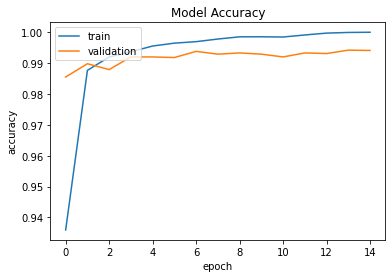

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

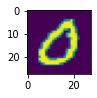

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


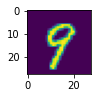

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


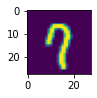

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


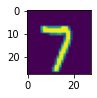

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


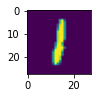

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


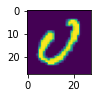

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


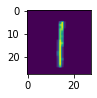

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


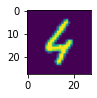

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


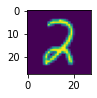

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
y_pred = model.predict(X_test)
import numpy as np

for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[10+ i])
  plt.show()  
  print(np.round(y_pred[i + 10]))